
1. Use fig.add_[h/v]line() and fig.add_[h/v]rect() to mark, respspectively, location (mean and median) and scale (range, interquartile range, and a range defined by two standard deviations away from the mean in both directions) of flipper_length_mm for each species onto plotly histograms of flipper_length_mm for each species in the penguins dataset

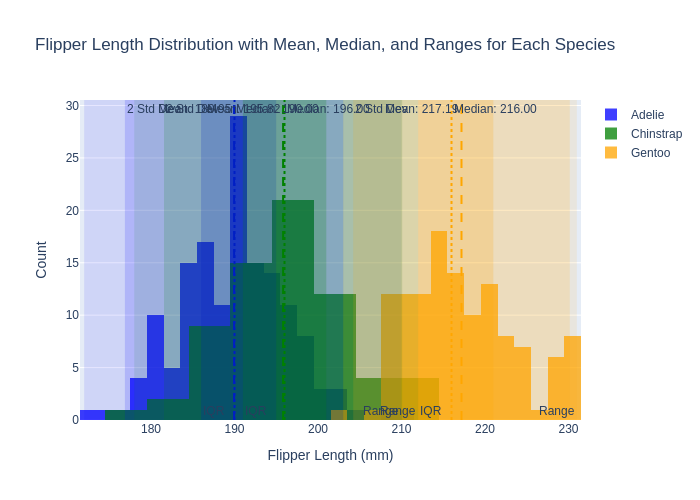

In [75]:
import pandas as pd
import plotly.graph_objects as go

# Load the penguins dataset
penguins = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

# Define a helper function to add statistical lines and rectangles to the histogram
def add_stats_to_histogram(fig, data, species, color):
    species_data = data[data['species'] == species]['flipper_length_mm'].dropna()
    
    # Calculate statistics
    mean = species_data.mean()
    median = species_data.median()
    min_val = species_data.min()
    max_val = species_data.max()
    q1 = species_data.quantile(0.25)
    q3 = species_data.quantile(0.75)
    std_dev = species_data.std()
    
    # Add vertical lines for mean and median
    fig.add_vline(x=mean, line=dict(color=color, dash="dash"), annotation_text=f"Mean: {mean:.2f}", annotation_position="top left")
    fig.add_vline(x=median, line=dict(color=color, dash="dot"), annotation_text=f"Median: {median:.2f}", annotation_position="top right")
    
    # Add rectangles for range, IQR, and 2 standard deviations
    fig.add_vrect(x0=min_val, x1=max_val, fillcolor=color, opacity=0.1, line_width=0, annotation_text="Range", annotation_position="bottom right")
    fig.add_vrect(x0=q1, x1=q3, fillcolor=color, opacity=0.2, line_width=0, annotation_text="IQR", annotation_position="bottom left")
    fig.add_vrect(x0=mean - 2*std_dev, x1=mean + 2*std_dev, fillcolor=color, opacity=0.15, line_width=0, annotation_text="2 Std Dev", annotation_position="top left")

# Create the figure
species_list = penguins['species'].dropna().unique()
colors = ['blue', 'green', 'orange']
fig = go.Figure()

# Add histogram and statistics for each species
for species, color in zip(species_list, colors):
    species_data = penguins[penguins['species'] == species]['flipper_length_mm'].dropna()
    fig.add_trace(go.Histogram(x=species_data, name=species, opacity=0.75, marker=dict(color=color)))
    
    # Add statistical annotations
    add_stats_to_histogram(fig, penguins, species, color)

# Update layout
fig.update_layout(
    title="Flipper Length Distribution with Mean, Median, and Ranges for Each Species",
    xaxis_title="Flipper Length (mm)",
    yaxis_title="Count",
    barmode="overlay"
)

# Show figure
fig.show(renderer="png")


Transition your ChatBot session from the previous problem to repeat the previous problem, but this time using seaborn kernel density estimation (KDE) plots to produce the desired figures organized in row of three plots

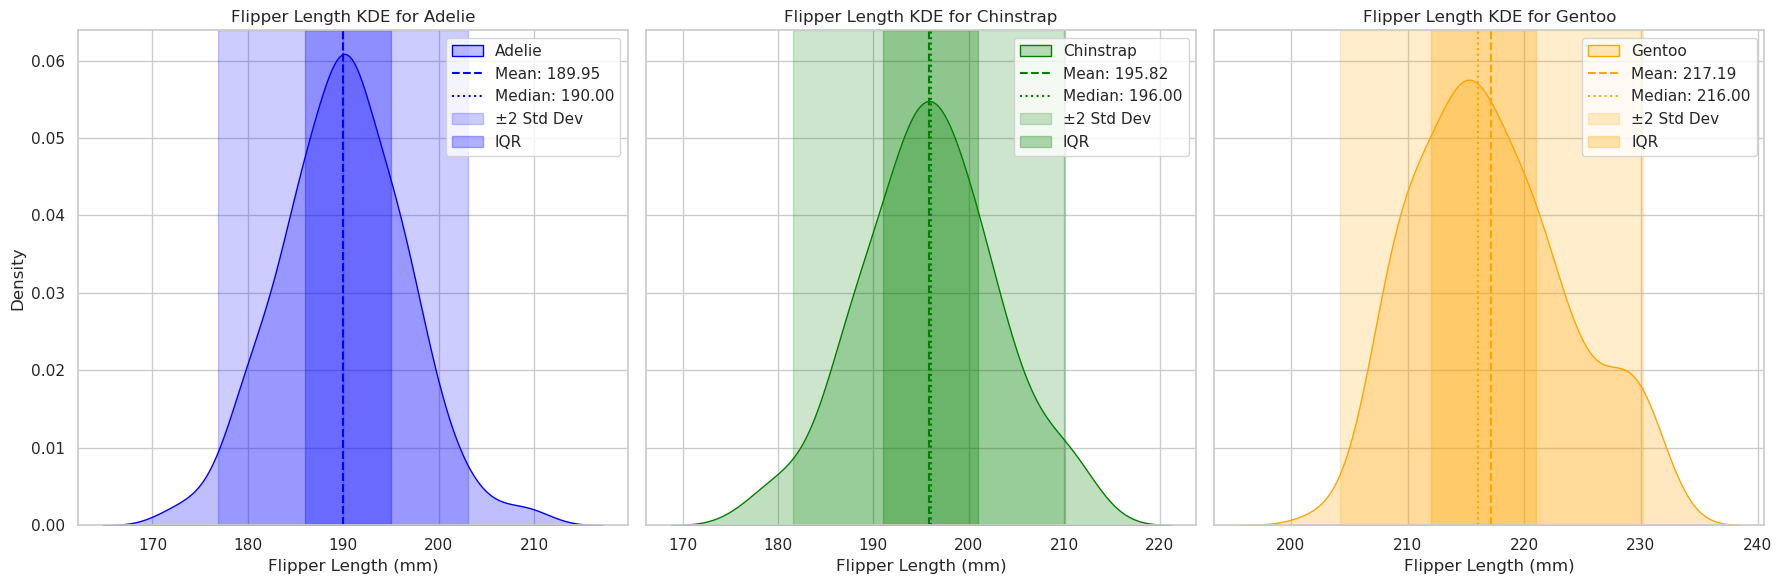

In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the penguins dataset
penguins = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

# Define a helper function to add statistical lines and rectangles to a seaborn KDE plot
def add_stats_to_kde(ax, species_data, color):
    mean = species_data.mean()
    median = species_data.median()
    std_dev = species_data.std()
    q1 = species_data.quantile(0.25)
    q3 = species_data.quantile(0.75)
    
    # Add mean and median lines
    ax.axvline(mean, color=color, linestyle="--", label=f'Mean: {mean:.2f}')
    ax.axvline(median, color=color, linestyle=":", label=f'Median: {median:.2f}')
    
    # Shade the range (±2 std dev), IQR, and full range
    ax.axvspan(mean - 2*std_dev, mean + 2*std_dev, alpha=0.2, color=color, label='±2 Std Dev')
    ax.axvspan(q1, q3, alpha=0.3, color=color, label='IQR')

# Set up the seaborn style
sns.set(style="whitegrid")

# Initialize the figure and axes
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Colors for each species
colors = ['blue', 'green', 'orange']
species_list = penguins['species'].dropna().unique()

# Generate KDE plots with statistics for each species
for i, species in enumerate(species_list):
    species_data = penguins[penguins['species'] == species]['flipper_length_mm'].dropna()
    ax = axes[i]
    
    # Plot the KDE
    sns.kdeplot(species_data, ax=ax, color=colors[i], fill=True, label=f"{species}")
    
    # Add statistics to the KDE plot
    add_stats_to_kde(ax, species_data, colors[i])
    
    # Set the titles and labels
    ax.set_title(f'Flipper Length KDE for {species}')
    ax.set_xlabel('Flipper Length (mm)')
    ax.set_ylabel('Density')
    ax.legend()

# Adjust the layout
plt.tight_layout()

# Show the figure
plt.show()


https://chatgpt.com/share/66f48246-ecbc-8010-832e-efbacd099c55

Summary: Initial Request: You provided code to create histograms for flipper_length_mm from the penguins dataset and asked for a modification to include mean, median, and statistical ranges using Plotly.

Histogram Code: I provided a code snippet that used Plotly to create histograms for each penguin species, adding vertical lines for mean and median, as well as shaded rectangles for range, interquartile range (IQR), and two standard deviations.

Transition to KDE Plots: You requested a transition to using Seaborn for kernel density estimation (KDE) plots, organized in rows of three for each species.

KDE Plot Code: I provided a new code snippet that created KDE plots for each species in the penguins dataset using Seaborn and Matplotlib, with annotations for mean, median, range, IQR, and standard deviations.

Explanation of Plotly Functions: You asked for an explanation of fig.add_vline() and fig.add_vrect():

fig.add_vline(): Adds a vertical line to a plot at a specified x-coordinate, useful for highlighting specific values.
fig.add_vrect(): Adds a vertical rectangle to indicate a range of values on the x-axis.


3. Search online for some images of box plots, histograms, and kernel density estimators (perhaps for the same data set); describe to a ChatBot what you think the contrasting descriptions of these three "data distribution" visualization methods are; and then see if the ChatBot agrees and what "pros and cons" list of these three "data distribution" visualization methods your ChatBot can come up with; finally, describe your preference for one or the other and your rationale for this preference

I prefer the bax plot, since it shows the mean, median, quartile and outliers directly, so I need no more calculation. And They provide a visual comparison between different groups, making it easy to see differences in distributions, which means it is more useful than histogram and KDE when comparing the overall of several groups of datas such as comparing the demand for coffee in different countries. What's more, box polt is the only method among all visualization methods which can reflect outliers. 


the images: https://mglerner.github.io/posts/histograms-and-kernel-density-estimation-kde-2.html
https://seaborn.pydata.org/tutorial/distributions.html

summary;Visualization Methods Discussion:

You discussed the utility of box plots, histograms, and Kernel Density Estimation (KDE) in summarizing data and comparing groups (e.g., coffee demand in different countries).
Box Plots: Provide a statistical summary including median, quartiles, and outliers; useful for comparing groups but limited in detail.
Histograms: Show frequency distribution, helping identify modality and detailed counts; sensitive to bin size.
KDE: Offers a smooth estimate of the probability density function, capturing trends effectively but sensitive to bandwidth choice.
Pros and Cons:

We explored the pros and cons of each visualization method:
Box Plots: Summary statistics and comparison ease vs. limited detail.
Histograms: Clear frequency representation vs. bin size sensitivity.
KDE: Smoothness and flexibility vs. bandwidth sensitivity and computational complexity.
KDE Details:

Further details about KDE were discussed, highlighting its smooth representation, flexibility, and challenges related to bandwidth sensitivity and computational demands.
KDE is suitable for visualizing continuous data distributions, particularly in large datasets.
Overall, we covered the characteristics, strengths, and weaknesses of box plots, histograms, and KDE as data visualization tools.

https://chatgpt.com/share/66f48fbf-2110-8010-95de-a67aaf4327aa

4. Run the code below and look at the resulting figure of distrubutions and then answer the following questions
Which datasets have similar means and similar variances
Which datasets have similar means but quite different variances
Which datasets have similar variances but quite different means
Which datasets have quite different means and quite different variances


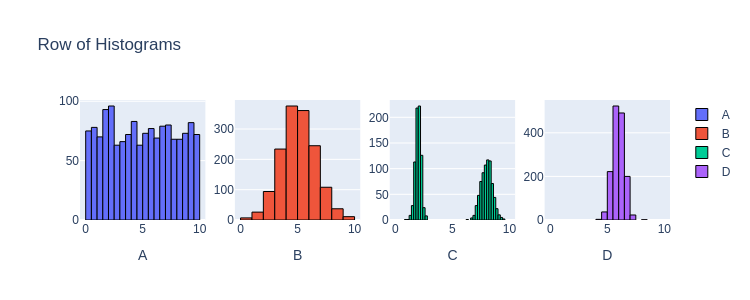

In [1]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS


A C  have similar means and similar variances

 A B have similar means but quite different variancesA B

BD have similar variances but quite different means

AC have quite different means and quite different variances

5. Start a new ChatBot session to explore the general relationship between the mean and median and "right" and "left" skewness (and why this is); what the following code does and how it works; and then explain (in your own words) the relationship between the mean and median and "right" and "left" skewness and what causes this, using and extending the code to demonstrate your explanation through a sequence of notebook cells.

Mean is the average of a set of data, and mean can be calculated by average formula. Median if the middle value of a dataset from smallest to largest. The right skewed distribution has a longer or fatter tail on the right side.And a left-skewed distribution has a longer or fatter tail on the left side.
When the median<mean, the data distribution is right-skewed, and when median > mean the data distribution is left-skewed, vice versa. 

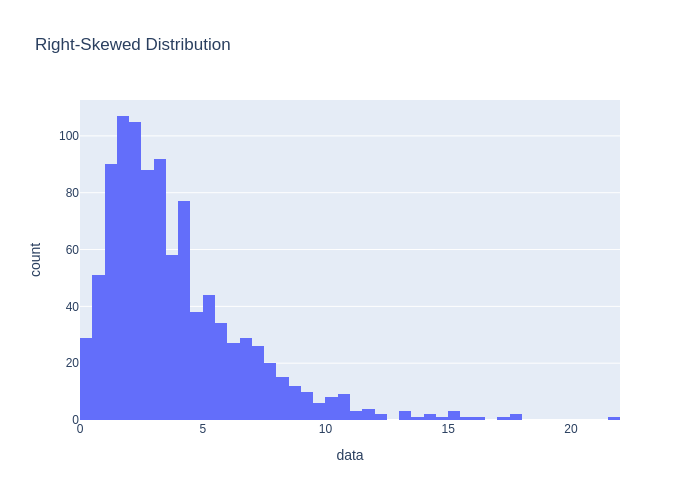

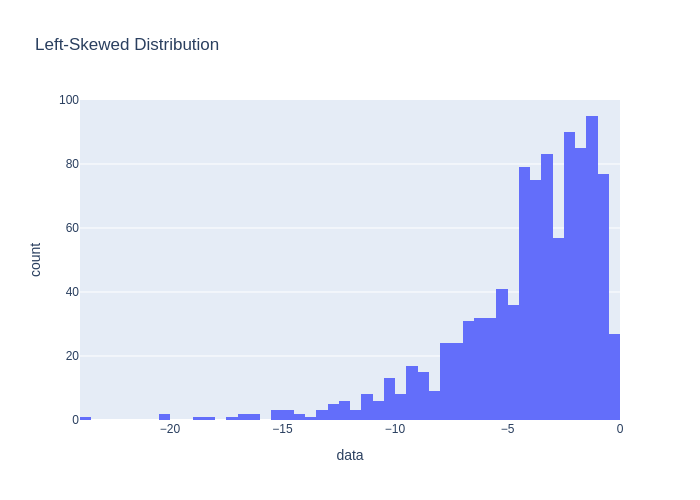

(3.8850000702277394, 3.133136959721669, -4.18752505356889, -3.433790592859748)

In [70]:
import numpy as np
import pandas as pd
import plotly.express as px
from scipy import stats

# Generating right-skewed data (Gamma distribution is right-skewed)
sample1 = stats.gamma(a=2, scale=2).rvs(size=1000)

# Generating left-skewed data (Negative of Gamma distribution)
sample2 = -stats.gamma(a=2, scale=2).rvs(size=1000)

# Visualizing the right-skewed data (sample1)
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data", title='Right-Skewed Distribution')
fig1.show(renderer="png")

# Visualizing the left-skewed data (sample2)
fig2 = px.histogram(pd.DataFrame({'data': sample2}), x="data", title='Left-Skewed Distribution')
fig2.show(renderer="png")

# Calculating mean and median for sample1 (right-skewed)
mean_sample1 = sample1.mean()
median_sample1 = np.quantile(sample1, 0.5)

# Calculating mean and median for sample2 (left-skewed)
mean_sample2 = sample2.mean()
median_sample2 = np.quantile(sample2, 0.5)

mean_sample1, median_sample1, mean_sample2, median_sample2


Summary:Data Generation:

You created a right-skewed distribution using the Gamma distribution (sample1) and mentioned wanting to create a left-skewed distribution.
I explained that sample1 is already right-skewed and suggested generating a left-skewed distribution by negating sample1 to create sample2.
Mean and Median Relationship:

I described the general relationship between the mean and median in relation to right and left skewness:
Right Skewness: Mean > Median (tail pulls mean to the right).
Left Skewness: Mean < Median (tail pulls mean to the left).
The explanation included visual representations of both skewness types.
Implications:

Understanding the relationship between mean and median helps interpret data distributions, especially in real-world scenarios where skewness is present.

link:https://chatgpt.com/share/66f49e10-31ac-8010-bb5d-47de6a7fcdfa

6. Go find an interesting dataset and use summary statistics and visualizations to understand and demonstate some interesting aspects of the data
Your approach should likely follow what was suggested for the Week 02 TUT Communication Activity from TUT
In the Week 03 TUT Communication Activity from TUT you will be put in groups and determine which group members dataset introduction will be presented by the group


In [20]:
# Maybe something like this? Feel free to use this one 
# if it strikes your fancy after look around a bit
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/manuelamc14/fast-food-Nutritional-Database/main/Tables/nutrition.csv")
df # df.columns


,restaurant id,category id,item id,serving size (oz),calories,calories from fat,total fat (g),total fat (% daily value),saturated fat (g),saturated fat (% daily value),...,carbohydrates (g),carbohydrates (% daily value),dietary fiber (g),dietary fiber (% daily value),sugars (g),protein (g),vitamin a (% daily value),vitamin c (% daily value),calcium (% daily value),iron (% daily value)
0,1000,100,0,4.8,300,120.0,13.0,20.0,5.0,25.0,...,31,10.0,4,17.0,3.0,17.0,10.0,0.0,25.0,15.0
1,1000,100,1,4.8,250,70.0,8.0,12.0,3.0,15.0,...,30,10.0,4,17.0,3.0,18.0,6.0,0.0,25.0,8.0
2,1000,100,2,3.9,370,200.0,23.0,35.0,8.0,42.0,...,29,10.0,4,17.0,2.0,14.0,8.0,0.0,25.0,10.0
3,1000,100,3,5.7,450,250.0,28.0,43.0,10.0,52.0,...,30,10.0,4,17.0,2.0,21.0,15.0,0.0,30.0,15.0
4,1000,100,4,5.7,400,210.0,23.0,35.0,8.0,42.0,...,30,10.0,4,17.0,2.0,21.0,6.0,0.0,25.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,3000,130,745,NaN,180,NaN,14.0,NaN,NaN,NaN,...,12,NaN,3,NaN,NaN,4.0,NaN,NaN,NaN,NaN
746,3000,130,746,NaN,190,NaN,18.0,NaN,NaN,NaN,...,6,NaN,3,NaN,NaN,7.0,NaN,NaN,NaN,NaN
747,3000,100,747,NaN,340,NaN,13.0,NaN,NaN,NaN,...,38,NaN,0,NaN,NaN,18.0,NaN,NaN,NaN,NaN
748,3000,100,748,NaN,90,NaN,8.0,NaN,NaN,NaN,...,5,NaN,4,NaN,NaN,1.0,NaN,NaN,NaN,NaN


In [29]:
df.shape

(750, 25)

In [40]:
df['calories'].describe()

count     750.000000
mean      296.149333
std       209.034366
min         0.000000
25%       150.000000
50%       260.000000
75%       410.000000
max      1880.000000
Name: calories, dtype: float64

In [42]:
df.isnull()

,restaurant id,category id,item id,serving size (oz),calories,calories from fat,total fat (g),total fat (% daily value),saturated fat (g),saturated fat (% daily value),...,carbohydrates (g),carbohydrates (% daily value),dietary fiber (g),dietary fiber (% daily value),sugars (g),protein (g),vitamin a (% daily value),vitamin c (% daily value),calcium (% daily value),iron (% daily value)
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,False,False,False,True,False,True,False,True,True,True,...,False,True,False,True,True,False,True,True,True,True
746,False,False,False,True,False,True,False,True,True,True,...,False,True,False,True,True,False,True,True,True,True
747,False,False,False,True,False,True,False,True,True,True,...,False,True,False,True,True,False,True,True,True,True
748,False,False,False,True,False,True,False,True,True,True,...,False,True,False,True,True,False,True,True,True,True


In [43]:
df.isnull().sum()

restaurant id                      0
category id                        0
item id                            0
serving size (oz)                355
calories                           0
calories from fat                490
total fat (g)                      0
total fat (% daily value)        490
saturated fat (g)                113
saturated fat (% daily value)    490
trans fat (g)                    113
cholesterol (mg)                 113
cholesterol (% daily value)      490
sodium (mg)                      113
sodium (% daily value)           490
carbohydrates (g)                  0
carbohydrates (% daily value)    490
dietary fiber (g)                  0
dietary fiber (% daily value)    490
sugars (g)                       113
protein (g)                        0
vitamin a (% daily value)        113
vitamin c (% daily value)        113
calcium (% daily value)          113
iron (% daily value)             113
dtype: int64

In [46]:
df.dropna()

,restaurant id,category id,item id,serving size (oz),calories,calories from fat,total fat (g),total fat (% daily value),saturated fat (g),saturated fat (% daily value),...,carbohydrates (g),carbohydrates (% daily value),dietary fiber (g),dietary fiber (% daily value),sugars (g),protein (g),vitamin a (% daily value),vitamin c (% daily value),calcium (% daily value),iron (% daily value)
0,1000,100,0,4.8,300,120.0,13.0,20.0,5.0,25.0,...,31,10.0,4,17.0,3.0,17.0,10.0,0.0,25.0,15.0
1,1000,100,1,4.8,250,70.0,8.0,12.0,3.0,15.0,...,30,10.0,4,17.0,3.0,18.0,6.0,0.0,25.0,8.0
2,1000,100,2,3.9,370,200.0,23.0,35.0,8.0,42.0,...,29,10.0,4,17.0,2.0,14.0,8.0,0.0,25.0,10.0
3,1000,100,3,5.7,450,250.0,28.0,43.0,10.0,52.0,...,30,10.0,4,17.0,2.0,21.0,15.0,0.0,30.0,15.0
4,1000,100,4,5.7,400,210.0,23.0,35.0,8.0,42.0,...,30,10.0,4,17.0,2.0,21.0,6.0,0.0,25.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,1000,108,255,10.1,510,150.0,17.0,26.0,9.0,44.0,...,80,27.0,1,4.0,64.0,12.0,15.0,0.0,40.0,8.0
256,1000,108,256,13.4,690,200.0,23.0,35.0,12.0,58.0,...,106,35.0,1,5.0,85.0,15.0,20.0,0.0,50.0,10.0
257,1000,108,257,6.7,340,100.0,11.0,17.0,6.0,29.0,...,53,18.0,1,2.0,43.0,8.0,10.0,0.0,25.0,6.0
258,1000,108,258,14.2,810,290.0,32.0,50.0,15.0,76.0,...,114,38.0,2,9.0,103.0,21.0,20.0,0.0,60.0,6.0


In [69]:
import pandas as pd
import plotly.express as px

df = pd.read_csv("https://raw.githubusercontent.com/manuelamc14/fast-food-Nutritional-Database/main/Tables/nutrition.csv")
print(df.columns)
fig = px.histogram(df, x='calories', nbins=45, 
                   title='Distribution of Calories in Fast Food Items',
                   labels={'calories': 'Calories'},
                   color_discrete_sequence=['skyblue']
fig.show(renderer="png")



SyntaxError: '(' was never closed (906297384.py, line 6)

Index(['restaurant id', 'category id', 'item id', 'serving size (oz)',
       'calories', 'calories from fat', 'total fat (g)',
       'total fat (% daily value)', 'saturated fat (g)',
       'saturated fat (% daily value)', 'trans fat (g)', 'cholesterol (mg)',
       'cholesterol (% daily value)', 'sodium (mg)', 'sodium (% daily value)',
       'carbohydrates (g)', 'carbohydrates (% daily value)',
       'dietary fiber (g)', 'dietary fiber (% daily value)', 'sugars (g)',
       'protein (g)', 'vitamin a (% daily value)', 'vitamin c (% daily value)',
       'calcium (% daily value)', 'iron (% daily value)'],
      dtype='object')


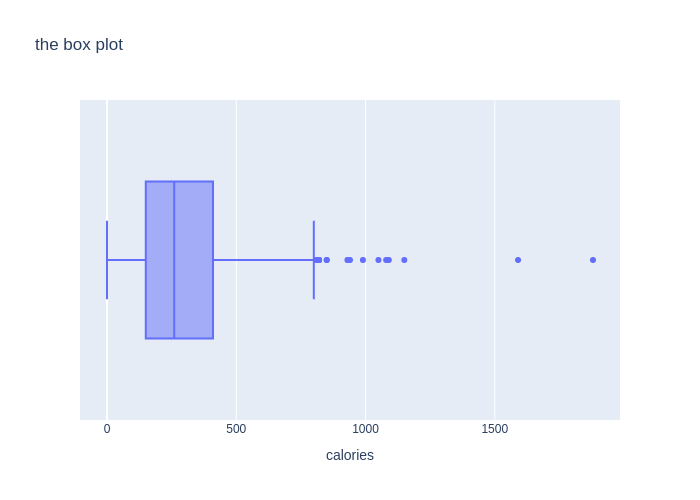

In [68]:
import pandas as pd
import plotly.express as px

df = pd.read_csv("https://raw.githubusercontent.com/manuelamc14/fast-food-Nutritional-Database/main/Tables/nutrition.csv")
print(df.columns)
fig=px.box(df,x='calories',
          title='the box plot')
fig.show(renderer="png")

<Axes: xlabel='calories', ylabel='Density'>

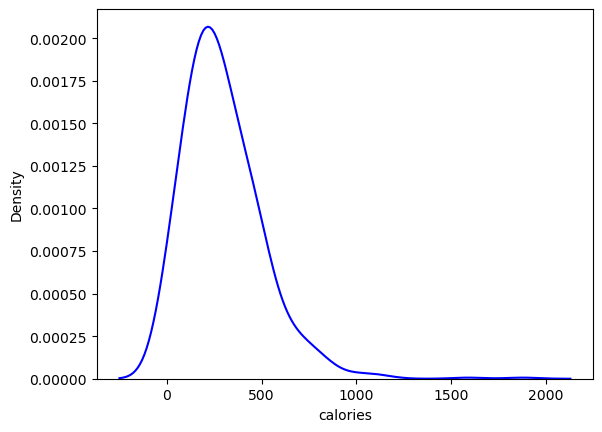

In [66]:
import seaborn as sns
sns.kdeplot(df['calories'], color='blue', fill=False, bw_adjust=1.5)

7. Watch the classic Gapminder Video, then have a look at the plotly version and recreate the animation (perhaps after optionally exploring and changing the style, if you wish)

8. Provide a second version of the figure from the previous problem where you edit the fig = px.scatter() function from the Gapminder code so that x is "percent change", y is "rank", size is "percent", and color="sex", animation_frame is "year", and animation_group and hover_name are "name". Then use size_max=50, range_x=[-0.005,0.005]) and remove the log_x=True and range_y parameters¶

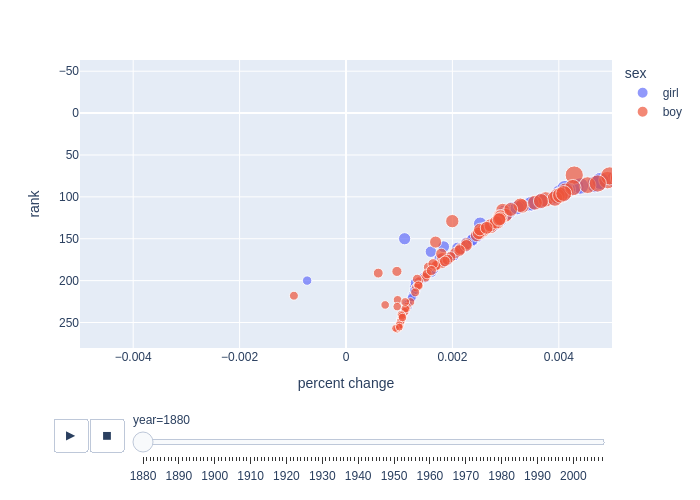

In [79]:
bn = pd.read_csv('https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv')
bn['name'] = bn['name']+" "+bn['sex'] # make identical boy and girl names distinct
bn['rank'] = bn.groupby('year')['percent'].rank(ascending=False)
bn = bn.sort_values(['name','year'])
# the next three lines create the increaes or decrease in name prevalence from the last year 
bn['percent change'] = bn['percent'].diff()
new_name = [True]+list(bn.name[:-1].values!=bn.name[1:].values)
bn.loc[new_name,'percentage change'] = bn.loc[new_name,'percent'] 
bn = bn.sort_values('year')
bn = bn[bn.percent>0.001] # restrict to "common" names
fig = px.scatter(bn, x="percent change", y="rank", animation_frame="year", animation_group="name",
                 size="percent", color="sex", hover_name="name",size_max=50, range_x=[-0.005,0.005]) # range_y removed
fig.update_yaxes(autorange='reversed') # this lets us put rank 1 on the top
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

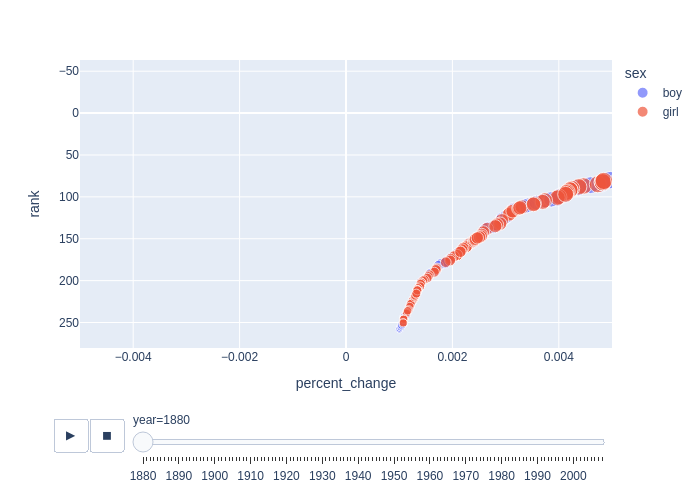

In [80]:
import pandas as pd
import plotly.express as px

# Load the baby names dataset
url = 'https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv'
bn = pd.read_csv(url)

# Combine names and sex to create unique identifiers for similar names
bn['unique_name'] = bn['name'] + " " + bn['sex']

# Rank names by their prevalence in each year
bn['rank'] = bn.groupby('year')['percent'].rank(ascending=False)

# Calculate the change in percentage for each name from the previous year
bn['percent_change'] = bn['percent'].diff()

# Identify where names change to reset the percent change correctly
name_change_mask = [True] + (bn['unique_name'][:-1].values != bn['unique_name'][1:].values).tolist()
bn.loc[name_change_mask, 'percent_change'] = bn.loc[name_change_mask, 'percent']

# Filter the DataFrame to keep only relevant names and sort by year
bn = bn[bn['percent'] > 0.001].sort_values('year')

# Create an animated scatter plot to visualize trends in name popularity over time
fig = px.scatter(
    bn,
    x='percent_change',
    y='rank',
    animation_frame='year',
    animation_group='unique_name',
    size='percent',
    color='sex',
    hover_name='unique_name',
    size_max=50,
    range_x=[-0.005, 0.005]  # Fixed range for x-axis
)

# Reverse the y-axis so that higher ranks (more popular) are at the top
fig.update_yaxes(autorange='reversed')

# Show the plot
fig.show(renderer="png")


9. Have you reviewed the course wiki-textbook and interacted with a ChatBot (or, if that wasn't sufficient, real people in the course piazza discussion board or TA office hours) to help you understand all the material in the tutorial and lecture that you didn't quite follow when you first saw it?


mostly

